In [46]:
import cv2
import matplotlib.pyplot as plt

In [47]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [48]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [49]:
model.setInputSize(180,180)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002D4195ECBB0>

In [50]:
labels = []
file_name = 'label.txt'
with open(file_name,'rt') as file:
    labels = file.read().rstrip('\n').split('\n')

print("Total number of labels: ",len(labels))
print("The labels are: \n",labels)

Total number of labels:  82
The labels are: 
 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'cricket bat', 'bat', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


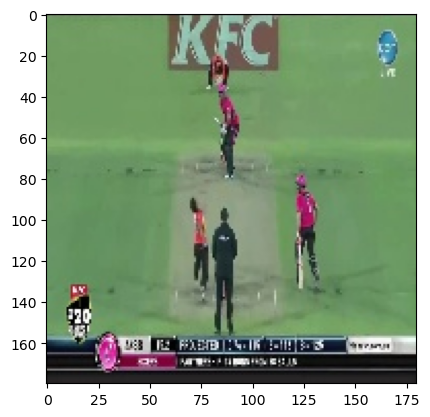

In [51]:
img1 = cv2.imread('dataset frames\\cover_frames\\frame1_0.jpeg')
#print(img1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)) # converted the image from bgr to rgb

In [52]:
ClassIndex, confidence, bbox = model.detect(img1,confThreshold=0.7)

In [53]:
print(ClassIndex)

[1]


In [54]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ind, conf, box, in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img1,box,(225,0,0),2)
    cv2.putText(img1,labels[ind-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,225,0),thickness=3)

False

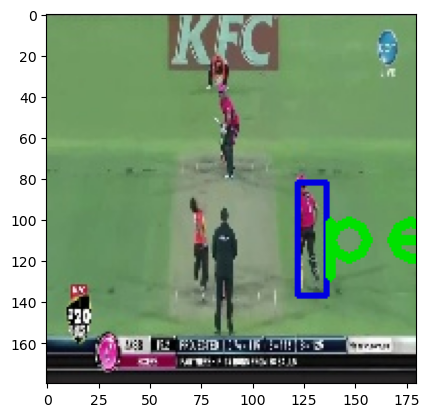

In [55]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
cv2.imwrite('./img/result1.jpg',img1)

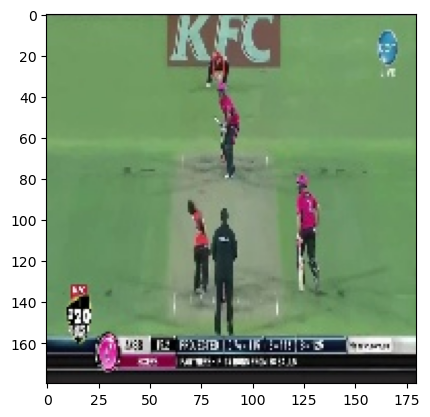

In [56]:
img2 = cv2.imread('dataset frames\\cover_frames\\frame1_1.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [57]:
ClassIndex, confidence, bbox = model.detect(img2,confThreshold=0.5)

In [58]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ind, conf, box, in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img2,box,(225,0,0),2)
    cv2.putText(img2,labels[ind-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,225,0),thickness=3)

False

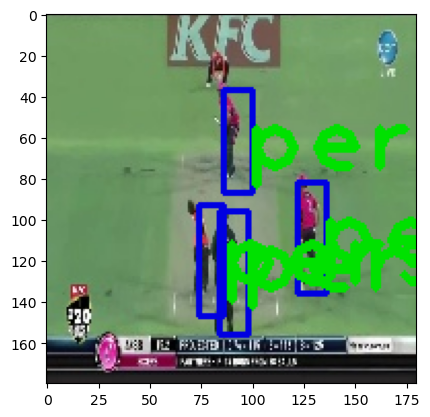

In [59]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
cv2.imwrite('./img/result2.jpg',img2)